In [1]:
import tensorflow as tf
import utils_img_rec as ut
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import pathlib

from operator import itemgetter

### Definindo variaveis

In [2]:
DATA_DIR  = '../bases/pickle/imagens/cifar10/cifar10-test-pickle.pickle'
TEST2_DIR = '../bases/dados/imagens/teste2/amostra-CIFAR10'

#DATA_DIR  = '../bases/pickle/imagens/mnist/mnist-test-pickle.pickle'
#TEST2_DIR = '../bases/dados/imagens/teste2/amostra-numerica'

formato = 'jpg'
IMG_SIZE = 32
numero_de_canais = 3

#DATA_DIR = pathlib.Path(DATA_DIR)
#TEST2_DIR = pathlib.Path(TEST2_DIR)

pickle_in = open(DATA_DIR,"rb")
data_train = pickle.load(pickle_in)

model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10-aug-EPOCHS=50 - val_acc = 0.5922 exec_time - 9886.943656682968.h5')
model.summary()
#model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        6176      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 16)          8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

### Definindo categorias

In [3]:
#CATEGORIES = []
CATEGORIES = ut.get_classes(data_train)
CATEGORIES.sort()
try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Preparando dados

In [4]:
def prepare(filepath):
    if numero_de_canais == 1:
        img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    else:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array, new_array.reshape(-1, IMG_SIZE, IMG_SIZE, numero_de_canais)

def plot_image(prediction_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(prediction_array)        
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Classe - {} | {:2.0f}% (true class {})".format(CATEGORIES[predicted_label], 100*np.max(prediction_array), CATEGORIES[true_label]), color=color)

def plot_value_array(prediction_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(CATEGORIES)), prediction_array, color= "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    print(CATEGORIES[true_label])
    thisplot[true_label].set_color('green')

airplane


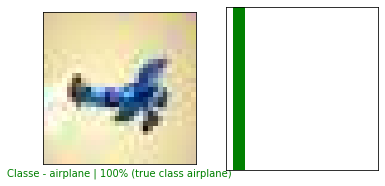

Classe - airplane    | Confiança - 99.98
Classe - deer        | Confiança - 0.016
Classe - bird        | Confiança - 0.003
Classe - automobile  | Confiança - 0.0  
Classe - cat         | Confiança - 0.0  
Classe - dog         | Confiança - 0.0  
Classe - frog        | Confiança - 0.0  
Classe - horse       | Confiança - 0.0  
Classe - ship        | Confiança - 0.0  
Classe - truck       | Confiança - 0.0  



automobile


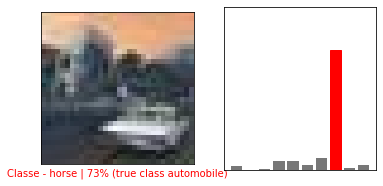

Classe - horse       | Confiança - 73.142
Classe - frog        | Confiança - 7.017
Classe - cat         | Confiança - 5.365
Classe - deer        | Confiança - 5.141
Classe - truck       | Confiança - 3.152
Classe - dog         | Confiança - 3.064
Classe - airplane    | Confiança - 2.04 
Classe - ship        | Confiança - 0.77 
Classe - bird        | Confiança - 0.179
Classe - automobile  | Confiança - 0.132



bird


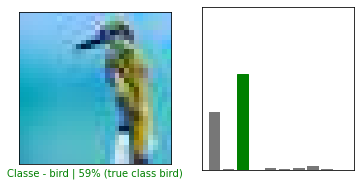

Classe - bird        | Confiança - 58.845
Classe - airplane    | Confiança - 35.609
Classe - horse       | Confiança - 2.461
Classe - deer        | Confiança - 0.992
Classe - frog        | Confiança - 0.822
Classe - automobile  | Confiança - 0.601
Classe - dog         | Confiança - 0.324
Classe - ship        | Confiança - 0.168
Classe - truck       | Confiança - 0.094
Classe - cat         | Confiança - 0.083



cat


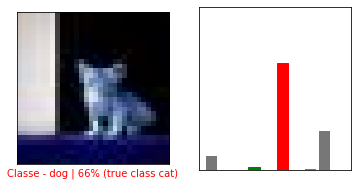

Classe - dog         | Confiança - 65.563
Classe - ship        | Confiança - 23.546
Classe - airplane    | Confiança - 8.737
Classe - cat         | Confiança - 1.651
Classe - horse       | Confiança - 0.304
Classe - deer        | Confiança - 0.099
Classe - bird        | Confiança - 0.095
Classe - truck       | Confiança - 0.004
Classe - automobile  | Confiança - 0.001
Classe - frog        | Confiança - 0.001



deer


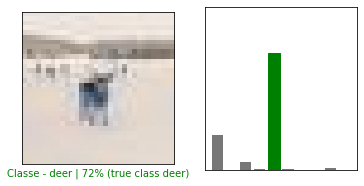

Classe - deer        | Confiança - 71.586
Classe - airplane    | Confiança - 21.193
Classe - bird        | Confiança - 4.786
Classe - ship        | Confiança - 1.239
Classe - cat         | Confiança - 0.629
Classe - dog         | Confiança - 0.396
Classe - automobile  | Confiança - 0.097
Classe - horse       | Confiança - 0.07 
Classe - frog        | Confiança - 0.003
Classe - truck       | Confiança - 0.002



dog


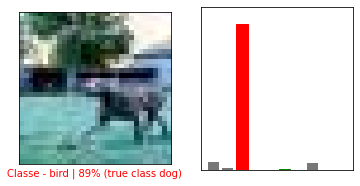

Classe - bird        | Confiança - 89.236
Classe - airplane    | Confiança - 4.535
Classe - horse       | Confiança - 4.395
Classe - automobile  | Confiança - 1.052
Classe - dog         | Confiança - 0.615
Classe - truck       | Confiança - 0.08 
Classe - cat         | Confiança - 0.048
Classe - deer        | Confiança - 0.037
Classe - frog        | Confiança - 0.001
Classe - ship        | Confiança - 0.0  



frog


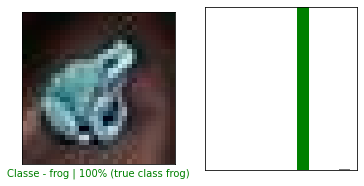

Classe - frog        | Confiança - 99.603
Classe - truck       | Confiança - 0.262
Classe - dog         | Confiança - 0.051
Classe - cat         | Confiança - 0.043
Classe - bird        | Confiança - 0.023
Classe - automobile  | Confiança - 0.007
Classe - ship        | Confiança - 0.005
Classe - horse       | Confiança - 0.004
Classe - deer        | Confiança - 0.002
Classe - airplane    | Confiança - 0.0  



horse


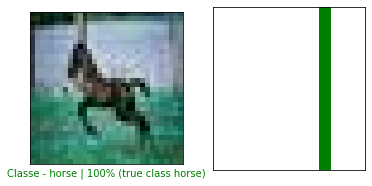

Classe - horse       | Confiança - 99.796
Classe - bird        | Confiança - 0.141
Classe - airplane    | Confiança - 0.058
Classe - dog         | Confiança - 0.003
Classe - deer        | Confiança - 0.002
Classe - cat         | Confiança - 0.001
Classe - automobile  | Confiança - 0.0  
Classe - frog        | Confiança - 0.0  
Classe - ship        | Confiança - 0.0  
Classe - truck       | Confiança - 0.0  



ship


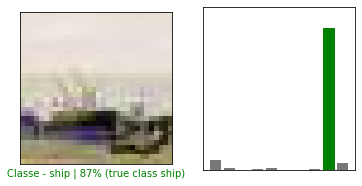

Classe - ship        | Confiança - 86.701
Classe - airplane    | Confiança - 6.234
Classe - truck       | Confiança - 4.391
Classe - deer        | Confiança - 0.943
Classe - automobile  | Confiança - 0.799
Classe - horse       | Confiança - 0.542
Classe - cat         | Confiança - 0.169
Classe - bird        | Confiança - 0.124
Classe - dog         | Confiança - 0.077
Classe - frog        | Confiança - 0.02 



truck


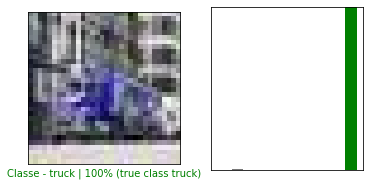

Classe - truck       | Confiança - 99.666
Classe - automobile  | Confiança - 0.176
Classe - horse       | Confiança - 0.042
Classe - dog         | Confiança - 0.031
Classe - ship        | Confiança - 0.026
Classe - cat         | Confiança - 0.024
Classe - deer        | Confiança - 0.016
Classe - frog        | Confiança - 0.013
Classe - airplane    | Confiança - 0.005
Classe - bird        | Confiança - 0.0  





In [5]:
for category in CATEGORIES:

    true_label_num = CATEGORIES.index (category)
    
    DIR = TEST2_DIR+'/previsao '+'(' + category + ').'+formato
    
    xp, Xp = prepare(DIR)

    Xp=np.array(Xp/255.0)
       
    prediction = model.predict( Xp )
    
    prev = prediction[0]

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)

    plot_image(prediction[0], true_label_num, xp)
    plt.subplot(1,2,2)
    plot_value_array(prediction[0],  true_label_num)
    plt.show()
    
    infos = []
    
    for i in range( len(prev) ):
        
        infos.append([str(CATEGORIES[i]), np.round(prev[i]*100, 3)])
        
        #print( 'Classe - {} | Confiança - {} %'.format(CATEGORIES[i], np.round(prev[i]*100, 2) ) )
    
    infos = sorted(infos[:], key=itemgetter(1), reverse = True)
    
    for i in range(len(prev)):
        
        print('Classe - {:<11} | Confiança - {:<5}'.format(infos[i][0], infos[i][1]))
        
        #print( infos[i][0], infos[i][1] )
    
    #print(  np.flip(np.sort(infos, axis=0,), axis=0)   )
    
    inp = model.inputs 
    
    k=0
    '''
    for layer in model.layers:
        if 'conv' in layer.name: 
            fig= plt.figure(figsize=(15,15))
            out = layer.output
            #print(out)
            feature_map = Model(inputs= inp, outputs= out)
            f = feature_map.predict(Xp)
              
            feature_map.summary()
            
            print('Ativação na {}° camada'.format(k+1))

            for i in range(f.shape[3]):

                #p = f[:,:,:,i]
                
                p = f[0,:,:,i]
                
                #print(p.shape)
                #print(p.shape[2])
                
                ax = fig.add_subplot(16,8,i+1)
                ax.imshow(p, cmap='gray')

            plt.show()
        k=k+1
    '''
    print('\n\n')